# 梯度下降 Gradient Descent

在前面关于选出最好的模型 $f^*$的过程中，我们简单提及了梯度下降，本节就对这一方法进行展开。

下面 $h(x)$ 是我们的模型， $\theta$ 是模型的参数集合，$ L(\theta) $是损失函数。

$$ h(x) = \Sigma_{i=1}^N \theta_i x_i $$
$$ L(\theta) =\frac{1}{N}\Sigma_{i=1}^N (y_i - h_\theta(x_i))^2 $$


对于 $\theta$ 值，初始给它一个随机值 $ \theta^0 $，代入 $ L(\theta)$中求偏导数，得到 $\nabla L(\theta^0)$，以此更新 $\theta $，循环往复到 $\nabla L(\theta^0) = 0$。

$$ \theta^1  = \theta^0 -  \eta\nabla L(\theta^0) $$
$$ \theta^2  = \theta^1 -  \eta\nabla L(\theta^1) $$
$$ ... $$
$$ \theta^{t+1}  = \theta^t -  \eta\nabla L(\theta^t) $$



## 一、学习速率 learning rate

### 1.1 定义
在 $\theta $更新的过程中，
$$ \theta^{t+1}  = \theta^t -  \eta\nabla L(\theta^t) $$

$\eta$ 是学习速率，更直接的理解是，$\eta$是步长，而 $\nabla L(\theta^t)$指示了方向。


学习速率 $\eta$ 的选择是特别注意的，$\eta$ 太小会导致学习效率太低，达到理想的效果需要太长的时间，$\eta$ 太大会导致一直不能达到理想的效果，如下图。

<div style="width:600px">
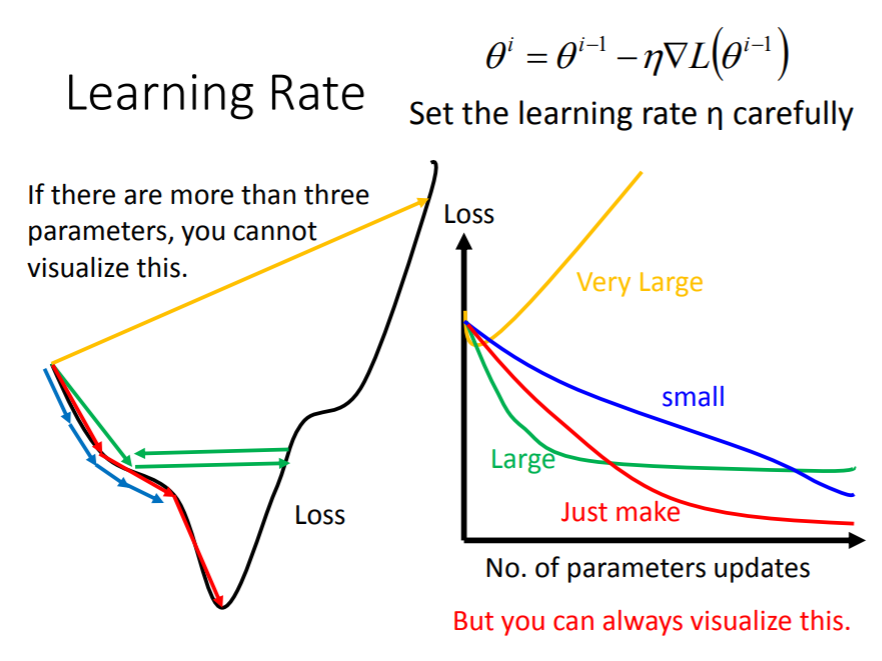    </div>

### 1.2 自适应学习速率与Adagrad

在训练开始的时候以一个更大的学习速率开始学习，随着训练轮数的增加，我们不断减小学习速率，比如 $\eta^t = \eta / \sqrt{t+1}$。

#### Adagrad 

$$ \theta^{t+1}  = \theta^t -  \frac{\eta}{\sqrt{\Sigma_{i=0}^t(\nabla L(\theta^i))^2 }}\nabla L(\theta^t) $$

Adagrad的缺点是在训练的中后期，分母上梯度平方的累加将会越来越大，从而梯度趋近于0，使得训练提前结束。

对于如何选择合适的学习速率这一问题，除了Adagrad还有很多方法，之后会再详细说，可提前参考这篇博文 https://blog.csdn.net/qsczse943062710/article/details/76763739


## 二、更快的训练

在前面的梯度下降法中，$\nabla L(\theta^0)$ 的计算是需要遍历所有训练集才能得出的，在数据量非常大的情况下，这种训练方法效率太低下。那么不遍历所有数据是否可以？

梯度下降法根据每次求解损失函数 $L$ 带入的样本数，可以分为：<strong>全量梯度下降</strong>（计算所有样本的损失），<strong>批量梯度下降</strong>（每次计算一个batch样本的损失）和<strong>随机梯度下降</strong>（每次随机选取一个样本计算损失）。

### 随机梯度下降 Stochastic Gradient Descent
Stochastic gradient descent 算法每读入一个数据，便立刻计算$\nabla L(\theta^0)$ 来更新参数。

如图，左侧是全量梯度下降遍历一遍数据后的模型的更新，右侧是随机梯度下降的模型的更新。
<div style="width:600px">
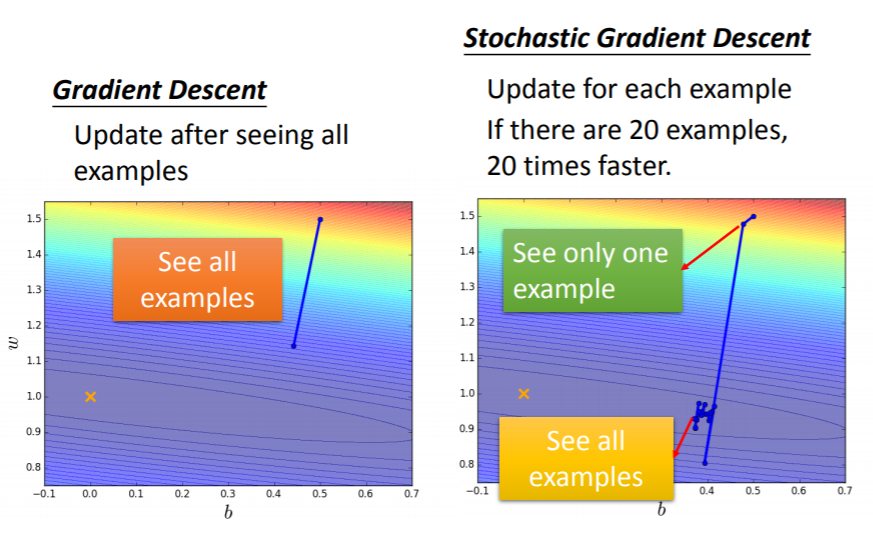</div>

#### 优点：
* 算法收敛速度快
* 在线更新
* 有几率跳出一个比较差的局部最优而收敛到一个更好的局部最优甚至是全局最优

#### 缺点：
* 容易收敛到局部最优，并且容易被困在鞍点
* 容易收噪点影响


### 批量梯度下降 Mini-batch Gradient Descent

Mini-batch Gradient Descent的方法是在全量与随机两个方法中取折衷, 每次从所有训练数据中取一个子集（mini-batch） 用于计算梯度 $\nabla L(\theta^0)$。

这样做不仅保证了一定的计算效率，而且收敛也比较稳定，不容易受噪点的影响。

## 三、数据清洗

详细可参考 https://developers.google.com/machine-learning/crash-course/representation/cleaning-data

* 缩放特征值，使不同的特征在同一个范围内。如图左侧，$w_2$ 微小的变动会对 $y$ 有较大的影响。

<div style="width:600px">
    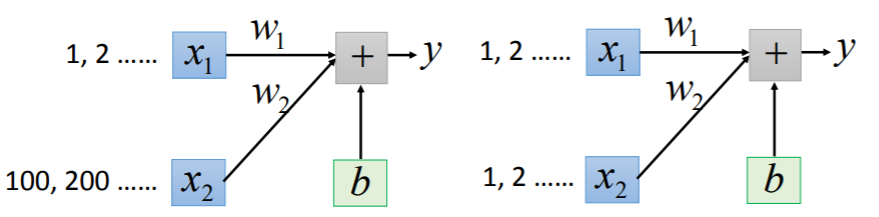</div>

* 处理极端离群值。
* 分箱分块。
* 清查不可靠样本。